In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc("font", family = "Malgun Gothic")
plt.rc('axes',unicode_minus = False)

In [3]:
df = pd.read_csv('data/일별평균대기오염도_2022(에어코리아).csv',encoding='cp949')
df

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0
1,20220101,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0
2,20220101,행주,0.034,0.012,0.7,0.004,27.0,16.0
3,20220101,항동,0.030,0.011,0.5,0.003,27.0,14.0
4,20220101,한강대로,0.037,0.011,0.6,0.003,34.0,14.0
...,...,...,...,...,...,...,...,...
18245,20221231,구로구,0.037,0.009,0.5,0.004,43.0,29.0
18246,20221231,광진구,0.026,0.005,0.8,0.003,44.0,34.0
18247,20221231,관악산,0.008,0.038,0.3,0.005,29.0,18.0
18248,20221231,관악구,0.045,0.009,0.7,0.003,42.0,28.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [10]:
# 측정일시 컬럼을 날짜형으로 변환
df['측정일시'] = df['측정일시'].astype(str)
df['측정일시']=df['측정일시'].str[:4]+ '-' + df['측정일시'].str[4:6] +'-'+df['측정일시'].str[6:]


In [12]:
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,2022-01-01,강남구,0.029,0.014,0.5,0.003,25.0,12.0
1,2022-01-01,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0
2,2022-01-01,행주,0.034,0.012,0.7,0.004,27.0,16.0
3,2022-01-01,항동,0.030,0.011,0.5,0.003,27.0,14.0
4,2022-01-01,한강대로,0.037,0.011,0.6,0.003,34.0,14.0


In [15]:
df['측정일시'] = pd.to_datetime(df['측정일시'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   측정일시          18250 non-null  datetime64[ns]
 1   측정소명          18250 non-null  object        
 2   이산화질소농도(ppm)  18172 non-null  float64       
 3   오존농도(ppm)     18176 non-null  float64       
 4   일산화탄소농도(ppm)  18174 non-null  float64       
 5   아황산가스농도(ppm)  18176 non-null  float64       
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64       
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.1+ MB


In [25]:
df_flt = df.loc[df['측정소명']=='세곡']
df_flt

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
22,2022-01-01,세곡,0.031,0.012,1.4,0.006,33.0,20.0
73,2022-01-02,세곡,0.027,0.016,1.1,0.004,41.0,27.0
123,2022-01-03,세곡,0.036,0.008,1.4,0.006,27.0,18.0
173,2022-01-04,세곡,0.031,0.013,1.3,0.004,44.0,22.0
223,2022-01-05,세곡,0.043,0.004,1.3,0.006,55.0,34.0
...,...,...,...,...,...,...,...,...
18023,2022-12-27,세곡,0.049,0.007,1.3,0.005,52.0,39.0
18073,2022-12-28,세곡,0.029,0.015,0.6,0.004,38.0,20.0
18123,2022-12-29,세곡,0.037,0.009,0.8,0.005,33.0,20.0
18173,2022-12-30,세곡,0.035,0.012,0.7,0.004,40.0,27.0


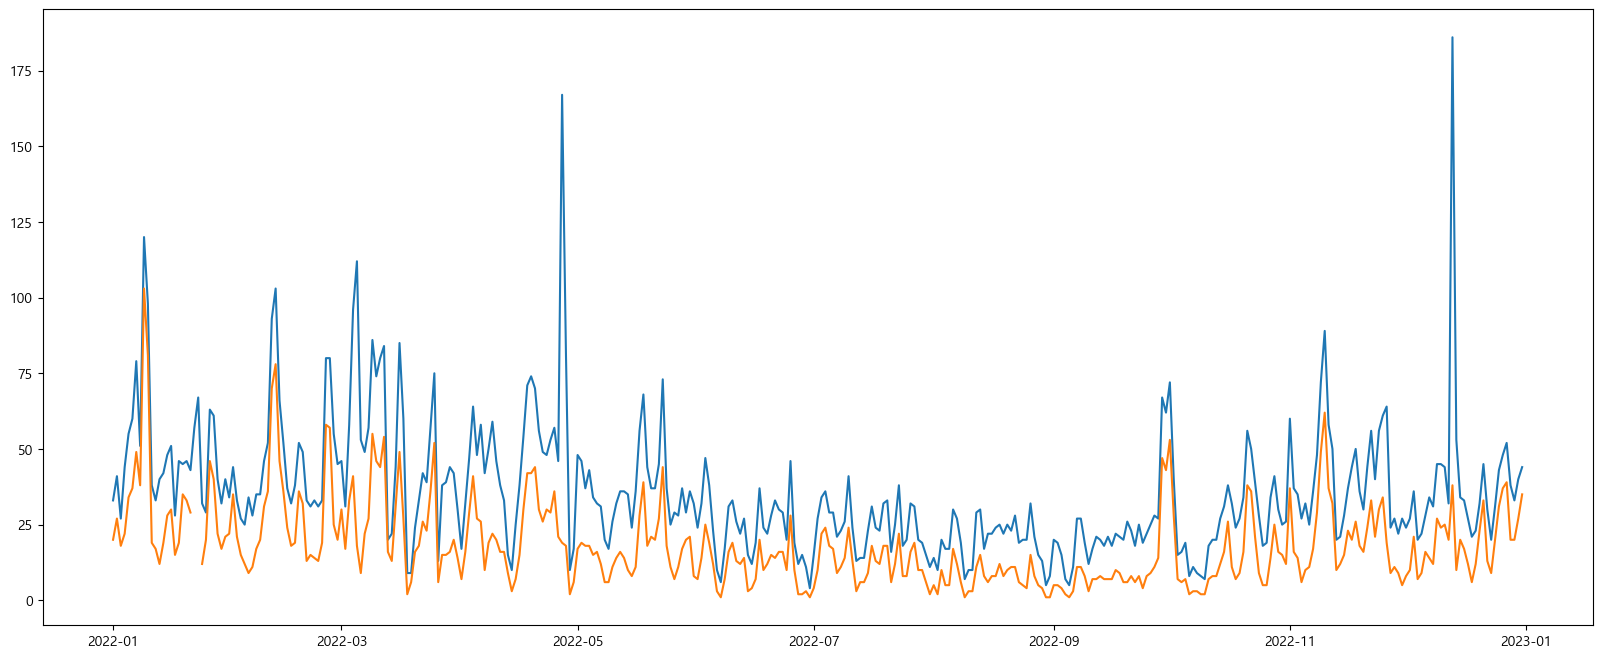

In [26]:
plt.figure(figsize=(20,8))
plt.plot(df_flt['측정일시'],df_flt['미세먼지농도(㎍/㎥)'])
plt.plot(df_flt['측정일시'],df_flt['초미세먼지농도(㎍/㎥)'])

In [28]:
df_flt2 = df_flt[['측정일시', '미세먼지농도(㎍/㎥)']]
df_flt2.columns=['측정일시', '미세먼지농도']
df_flt3 = df_flt2.set_index('측정일시')
df_flt3.head()

,미세먼지농도
측정일시,
2022-01-01,33.0
2022-01-02,41.0
2022-01-03,27.0
2022-01-04,44.0
2022-01-05,55.0


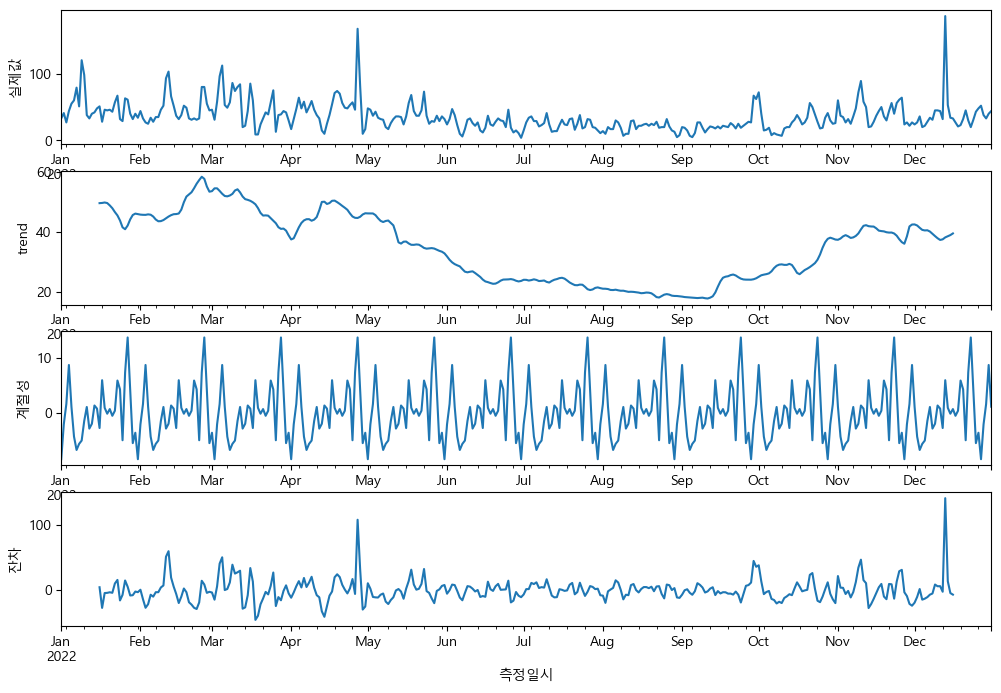

In [31]:
# trend 추세, 계절성,  실제값
result = seasonal_decompose(df_flt3['미세먼지농도'],
                           period=30, # 30일 단위로 계절성을 분석
                           model='additive' # 계절성, 추세를 잔차를 덧셈에의해 분석
                           )
fig, axes = plt.subplots(4, 1, figsize=(12,8))
result.observed.plot(ax=axes[0]) # 실제값
axes[0].set_ylabel('실제값')
result.trend.plot(ax=axes[1])
axes[1].set_ylabel('trend')
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('계절성')
result.resid.plot(ax=axes[3])
axes[3].set_ylabel('잔차')
plt.show()

In [40]:
# facebook 에서 개발한 시계열 예측 라이브러리 pip install prophet
from prophet import Prophet
df_flt2.columns=['ds','y']
df_flt2.head()

,ds,y
22,2022-01-01,33.0
73,2022-01-02,41.0
123,2022-01-03,27.0
173,2022-01-04,44.0
223,2022-01-05,55.0


In [41]:
p = Prophet()
p.fit(df_flt2)

16:38:48 - cmdstanpy - INFO - Chain [1] start processing
16:38:48 - cmdstanpy - INFO - Chain [1] done processing


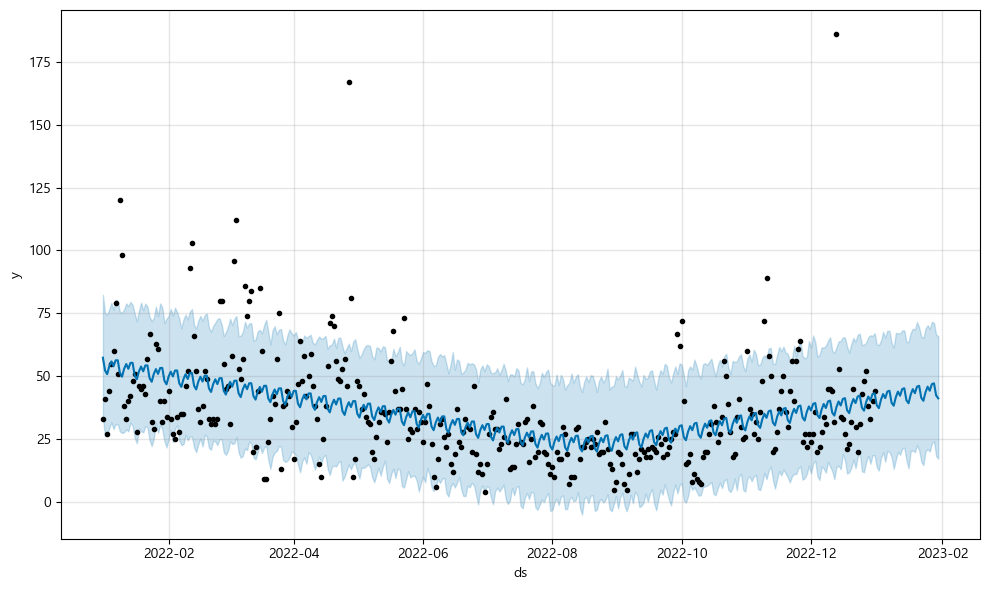

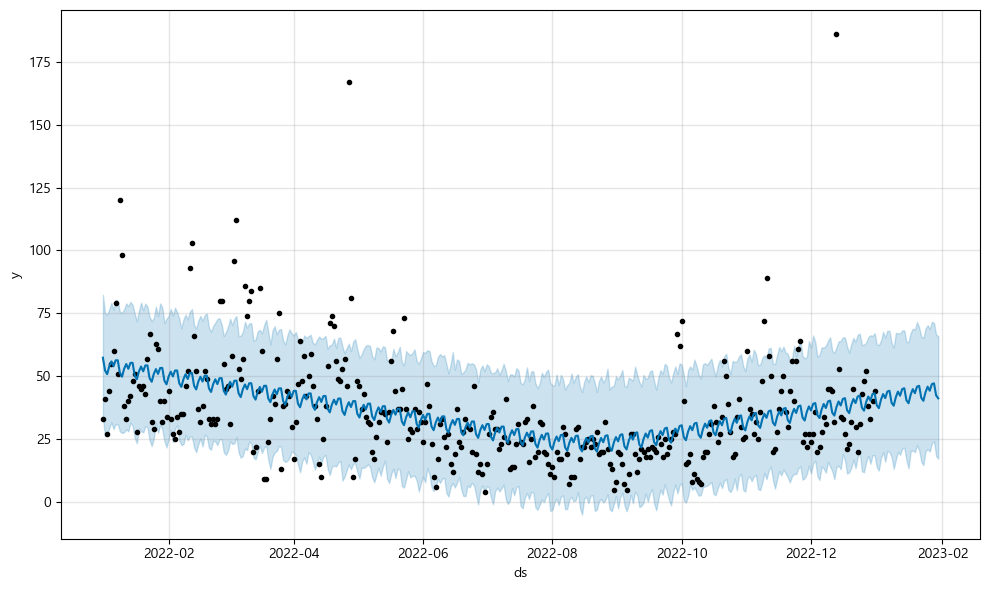

In [42]:
future = p.make_future_dataframe(periods=30) # 30일 이후의 데이터를 예측
forecast = p.predict(future)
p.plot(forecast)


In [45]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
390,2023-01-26,44.249426,20.094950,68.800057
391,2023-01-27,46.880777,23.375116,71.649183
392,2023-01-28,47.199418,24.180726,71.288110
393,2023-01-29,42.416536,18.284685,66.496218
394,2023-01-30,41.239287,17.234020,65.985207


In [48]:
forecast.loc[forecast['ds']=='2023-01-15',['ds','yhat','yhat_lower','yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
379,2023-01-15,40.456762,16.668335,63.571663
